# Testing


# Importing libraries

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

import pickle
f = open('Logistc_regression_model','rb')
clf = pickle.load(f)

%matplotlib inline

# Importing files

In [13]:
data = np.genfromtxt("group2_te.csv",delimiter=",", dtype="int")
n = data.shape[1] - 1
X_test = data[:,0:n]
y_test = data[:,n:n+1]

# Scaling data

In [14]:
sc = StandardScaler()
sc.fit(X_test)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Testing and results Generation

# Overall Accuracy

In [15]:
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

print(score)
print("-------------------")
print(y_pred)

0.8855
-------------------
[9 1 6 ... 1 0 7]


# Confusion Matrix

In [16]:
print(confusion_matrix(y_test, y_pred))

[[186   0   4   1   1   3   1   0   0   0]
 [  0 168   1   1   0   0   0   1   1   0]
 [  0   2 183   5   3   2   6   4   7   1]
 [  2   4   5 172   1   9   1   1   5   4]
 [  0   1   2   3 183   0   1   2   2   7]
 [  2   3   4  12   1 187   7   0   5   2]
 [  1   1   3   0   2   2 171   0   0   1]
 [  0   2   1   4   1   0   0 170   0   7]
 [  5   6   3   3   3  11   0   1 169   6]
 [  2   2   3   7   9   0   0  11   2 182]]


# Testing Metrics

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       196
           1       0.89      0.98      0.93       172
           2       0.88      0.86      0.87       213
           3       0.83      0.84      0.83       204
           4       0.90      0.91      0.90       201
           5       0.87      0.84      0.86       223
           6       0.91      0.94      0.93       181
           7       0.89      0.92      0.91       185
           8       0.88      0.82      0.85       207
           9       0.87      0.83      0.85       218

   micro avg       0.89      0.89      0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.88      2000



# Per Class Accuracy

In [18]:
con_m = (confusion_matrix(y_test, y_pred))
con_mi = con_m.astype('float')/con_m.sum(axis=1)[:,np.newaxis]
cm_accuarcies = []
print(con_mi)

for i in range(10):
    cm_accuarcies.append(con_mi[i][i])
print(cm_accuarcies)

[[0.94897959 0.         0.02040816 0.00510204 0.00510204 0.01530612
  0.00510204 0.         0.         0.        ]
 [0.         0.97674419 0.00581395 0.00581395 0.         0.
  0.         0.00581395 0.00581395 0.        ]
 [0.         0.00938967 0.85915493 0.02347418 0.01408451 0.00938967
  0.02816901 0.01877934 0.03286385 0.00469484]
 [0.00980392 0.01960784 0.0245098  0.84313725 0.00490196 0.04411765
  0.00490196 0.00490196 0.0245098  0.01960784]
 [0.         0.00497512 0.00995025 0.01492537 0.91044776 0.
  0.00497512 0.00995025 0.00995025 0.03482587]
 [0.00896861 0.01345291 0.01793722 0.05381166 0.0044843  0.83856502
  0.03139013 0.         0.02242152 0.00896861]
 [0.00552486 0.00552486 0.01657459 0.         0.01104972 0.01104972
  0.94475138 0.         0.         0.00552486]
 [0.         0.01081081 0.00540541 0.02162162 0.00540541 0.
  0.         0.91891892 0.         0.03783784]
 [0.02415459 0.02898551 0.01449275 0.01449275 0.01449275 0.0531401
  0.         0.00483092 0.81642512 0.

Text(0, 0.5, 'Per Class Accuracies')

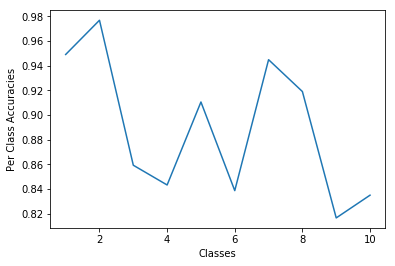

In [19]:
labels = [1,2,3,4,5,6,7,8,9,10]

plt.plot(labels,cm_accuarcies)
plt.xlabel('Classes')
plt.ylabel('Per Class Accuracies')

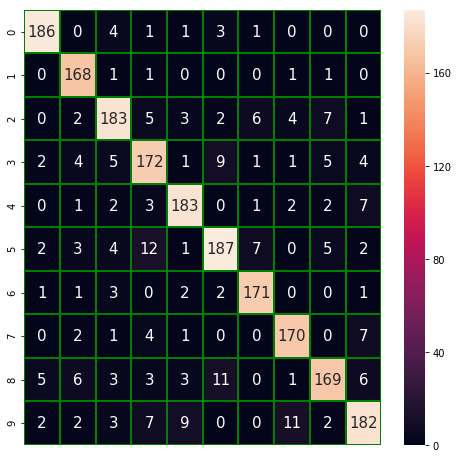

In [20]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize=(8,8))
sn.heatmap(con_m, annot = True, annot_kws= {"size":15}, fmt="d", linewidth = 1, linecolor = "g", xticklabels = False)

[6]


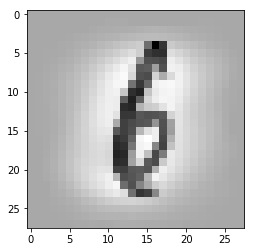

In [21]:
indextoshow = 89 #Change this as desired

X = X_test[indextoshow]
X.shape = (28, 28)
plt.imshow(255-X, 'gray', interpolation="nearest")

y_pred = clf.predict( [X_test[indextoshow]] )
print(y_pred)